In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
# Load dataset
now  = datetime.utcnow()-timedelta(hours=1)
data = xr.open_dataset(f'http://nomads.ncep.noaa.gov:80/dods/blend/blend{now:%Y%m%d}/blend_1hr_{str(now.hour).zfill(2)}z')

# Extract specifc variables
data = data[['tmp2m', 'dpt2m', 'wdir10m', 'wind10m', 'gust10m', 'apcpsfc', 'apcp254gtsfc', 'tstmsfc', 'tcdcsfc', 'asnow1016gtsfc', 'asnowsfc']]

# Extract data for lat/lon point
data = data.sel(lat=42.38, lon=-76.87, method='nearest', tolerance=1)

data

<xarray.Dataset>
Dimensions:         (time: 36)
Coordinates:
    lat             float64 42.37
    lon             float64 -76.88
  * time            (time) datetime64[ns] 2020-11-21T21:00:00 ... 2020-11-23T08:00:00
Data variables:
    tmp2m           (time) float32 ...
    dpt2m           (time) float32 ...
    wdir10m         (time) float32 ...
    wind10m         (time) float32 ...
    gust10m         (time) float32 ...
    apcpsfc         (time) float32 ...
    apcp254gtsfc    (time) float32 ...
    tstmsfc         (time) float32 ...
    tcdcsfc         (time) float32 ...
    asnow1016gtsfc  (time) float32 ...
    asnowsfc        (time) float32 ...
Attributes:
    title:        National Blend of Models hourly fcst starting 21Z21Nov2020,...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Sat Nov 21 21:17:05 GMT 2020 : imported by GrADS Data Serve...

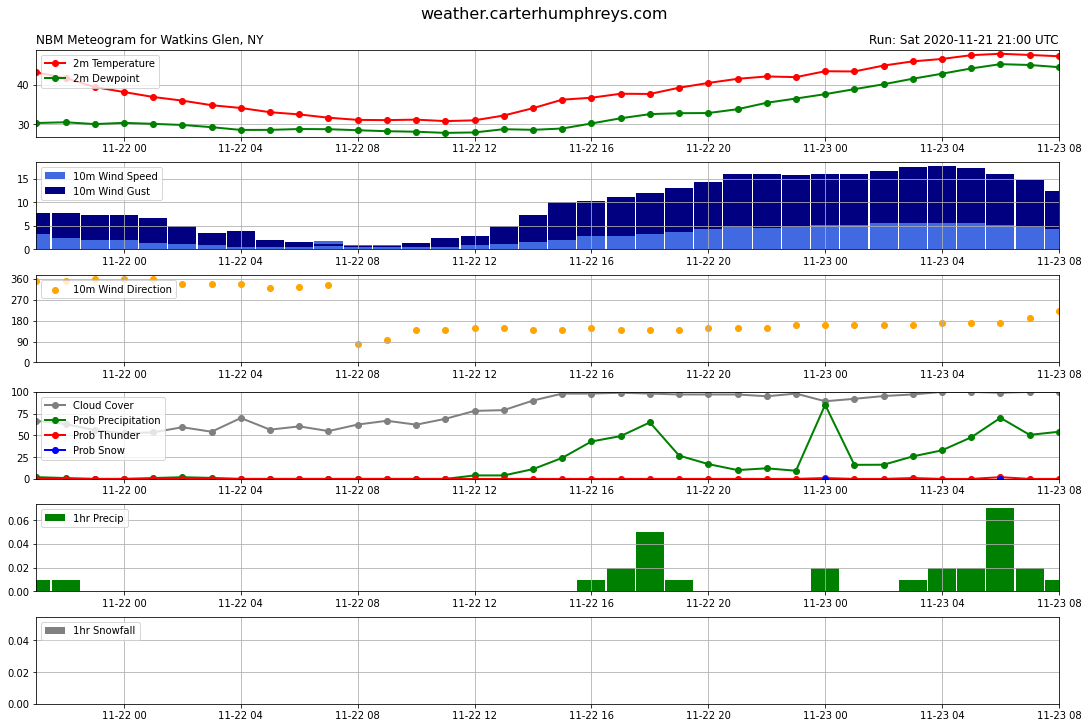

In [5]:
# Setup Plot 
fig, axs = plt.subplots(ncols=1, nrows=6, constrained_layout=True, figsize=(15, 10))

# Add title
plt.suptitle(f'weather.carterhumphreys.com', fontsize=16)

# Change datetiem64 to datetime
valid = datetime.utcfromtimestamp(data.time[0].values.astype('O')/1e9)

# Add plot headers
axs[0].set_title(f'NBM Meteogram for Watkins Glen, NY', loc='left')
axs[0].set_title(f'Run: {valid.strftime("%a %Y-%m-%d %H:%M")} UTC', loc='right')

# 2m Temperature and Dewpoint
axs[0].plot(data.time, (data.tmp2m-273.15)*(9/5)+32, label='2m Temperature', color='red', linewidth=2, marker='o')
axs[0].plot(data.time, (data.dpt2m-273.15)*(9/5)+32, label='2m Dewpoint', color='green', linewidth=2, marker='o')

# Wind Speed and Wind Gust
axs[1].bar(data.time, data.wind10m*2.237, label='10m Wind Speed', color='royalblue', width=0.04)
axs[1].bar(data.time, (data.gust10m-data.wind10m)*2.237, bottom=data.wind10m, label='10m Wind Gust', color='navy', width=0.04)
axs[1].set_ylim(0)

# Wind Speed and Wind Gust
axs[2].scatter(data.time, data.wdir10m, label='10m Wind Direction', color='orange')
axs[2].set_yticks([0, 90, 180, 270, 360])

# Prob Snow, Prob Rain, Prob Thunder, Cloud Cover
axs[3].plot(data.time, data.tcdcsfc, label='Cloud Cover', color='gray', linewidth=2, marker='o')
axs[3].plot(data.time, data.apcp254gtsfc, label='Prob Precipitation', color='green', linewidth=2, marker='o')
axs[3].plot(data.time, data.tstmsfc, label='Prob Thunder', color='red', linewidth=2, marker='o')
axs[3].plot(data.time, data.asnow1016gtsfc, label='Prob Snow', color='blue', linewidth=2, marker='o')
axs[3].set_ylim(0, 100)

# Precipitation
axs[4].bar(data.time, np.around(data.apcpsfc/25.4, 2), label='1hr Precip', color='green', width=0.04)
axs[4].set_ylim(0)

# Snwofall
axs[5].bar(data.time, np.around(data.asnowsfc/39.37, 1), label='1hr Snowfall', color='grey', width=0.04)
axs[5].set_ylim(0)

for ax in axs:
    ax.grid(True)
    ax.legend(loc='upper left')
    ax.set_xlim(data.time[0], data.time[-1])

plt.show()